# Boston vs. Seattle Airbnb IIII 

**In this notebook(Part 4), I will be answering the last 2 questions.**<br>
> **`1.` How does the price in each city change each month? Be sure to compare the 2 cities.** <br>
**`2.` How does total number of listings change each month? Be sure to compare the 2 cities.**

In [1]:
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## How does the price in each city change each month? How does total number of listings change each month? Be sure to compare the 2 cities.

### Step 1: Examining and Cleaning Data

In [2]:
# import all necessary datasets
seattle_calendar = pd.read_csv('seattle_airbnb/calendar.csv')
boston_calendar = pd.read_csv('boston_airbnb/calendar.csv')

In [3]:
seattle_calendar.shape

(1393570, 4)

In [4]:
boston_calendar.shape

(1308890, 4)

In [5]:
seattle_min_date = seattle_calendar.date.min()
seattle_max_date = seattle_calendar.date.max()

print(f"The date range for Seattle's listings is {seattle_min_date} to {seattle_max_date}.")

The date range for Seattle's listings is 2016-01-04 to 2017-01-02.


In [6]:
boston_min_date = boston_calendar.date.min()
boston_max_date = boston_calendar.date.max()

print(f"The date range for Seattle's listings is {boston_min_date} to {boston_max_date}.")

The date range for Seattle's listings is 2016-09-06 to 2017-09-05.


In [7]:
#cleaning up the price
# map help - https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
seattle_calendar['price'] = seattle_calendar['price'].map(lambda x: int(x[1:-3].replace(',','')), 
                                                          na_action='ignore')
boston_calendar['price'] = boston_calendar['price'].map(lambda x: int(x[1:-3].replace(',','')), 
                                                          na_action='ignore')

In [8]:
# make new column - month
import calendar
seattle_calendar['month'] = pd.to_datetime(seattle_calendar['date']).dt.month
boston_calendar['month'] = pd.to_datetime(boston_calendar['date']).dt.month

### Step 2: Addressing And Handling Missing Data 
### AND
### Step 3: Data Visualization

**From earlier, we know that there are many null values in the price column, but we do not want to drop these row as we will need them later. Therefore, I will be seperating the dataset into 2 based on availablity. From here I will answer the questions presented above**

### How do the toal number of listings change each month?

In [9]:
# grouping by avaiablity 
seattle_t_availablity = seattle_calendar[seattle_calendar['available'] == 't']
seattle_f_availablity = seattle_calendar[seattle_calendar['available'] == 'f']

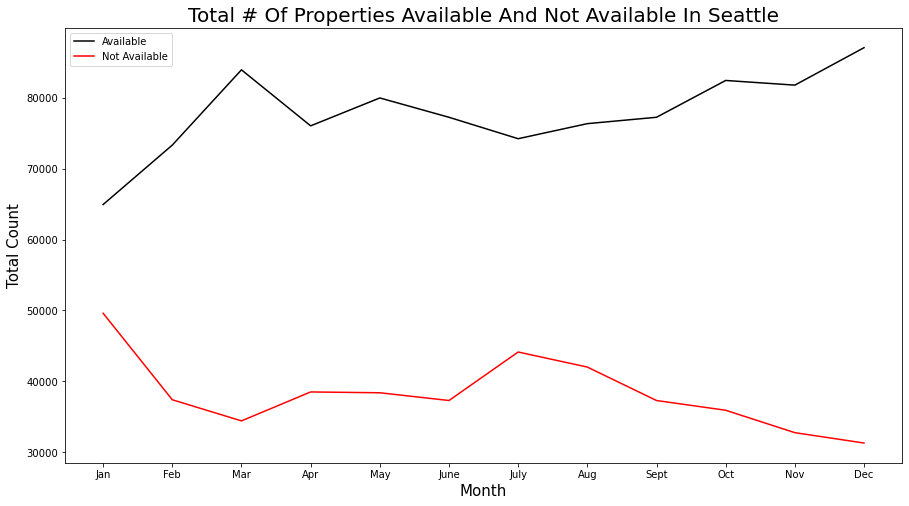

In [10]:
seattle_t_rented = seattle_t_availablity['month'].value_counts().sort_index()
seattle_f_rented = seattle_f_availablity['month'].value_counts().sort_index()
labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July',
         'Aug', 'Sept','Oct','Nov', 'Dec')
positions = (1,2,3,4,5,6,7,8,9,10,11,12)

plt.figure(figsize=(15, 8))
seattle_t_rented.plot(label = 'Available', color = 'black') 
seattle_f_rented.plot(label = 'Not Available', color = 'red')
plt.title('Total # Of Properties Available And Not Available In Seattle', fontsize = 20)
plt.xticks(positions, labels)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Total Count', fontsize = 15)
plt.legend()
plt.savefig('Properties Available And Not Available In Seattle.png');

**Here, we can see that at no point do the 2 lines cross. It seems that no matter the month, there will always be more available than occupied in the city of Seattle, at least for the year 2016-17. We can see a massive dip from Jan. to Feb. and it seems like it never really recovered. Availability of properties in Seattle reached its highest point in Dec.**

In [11]:
# grouping by avaiablity 
boston_t_availablity = boston_calendar[boston_calendar['available'] == 't']
boston_f_availablity = boston_calendar[boston_calendar['available'] == 'f']

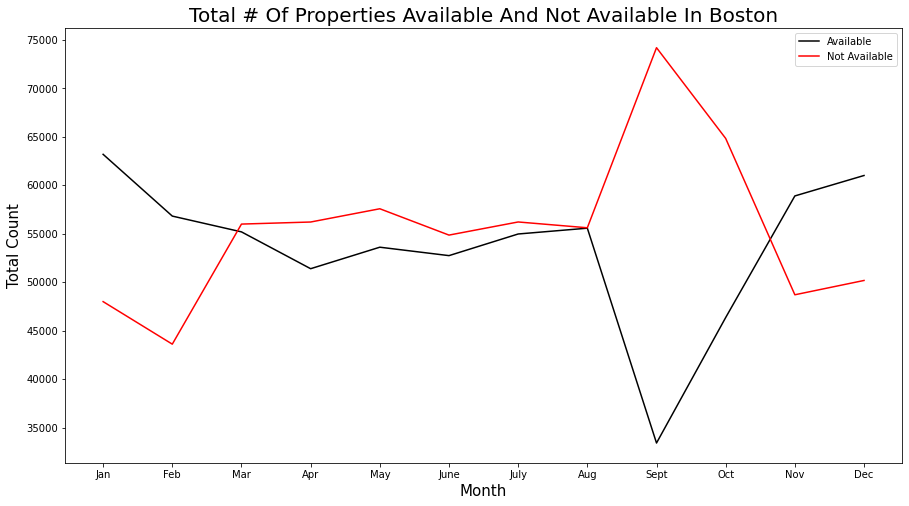

In [12]:
boston_t_rented = boston_t_availablity['month'].value_counts().sort_index()
boston_f_rented = boston_f_availablity['month'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
boston_t_rented.plot(label = 'Available', color = 'black') 
boston_f_rented.plot(label = 'Not Available', color = 'red')
plt.title('Total # Of Properties Available And Not Available In Boston', fontsize = 20)
plt.xticks(positions, labels)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Total Count', fontsize = 15)
plt.legend()
plt.savefig('Properties Available And Not Available In Boston.png');

**In this graph, you can see that the line plots have wider fluctuations which caused them to cross each other at 3 points. We can see that Sept. has the highest unavailability rate; this could be because of students who might be going back to Boston for college. On average, it seems that there are more times when occupied properties outweighed the available ones. Overall, it seems pretty evened out, unlike Seattle.**

### How does the price in each city change each month?

In [13]:
s_avg_price = seattle_calendar[seattle_calendar['available'] == 't'].groupby(['month'])['price'].mean()
b_avg_price = boston_calendar[boston_calendar['available'] == 't'].groupby(['month'])['price'].mean()

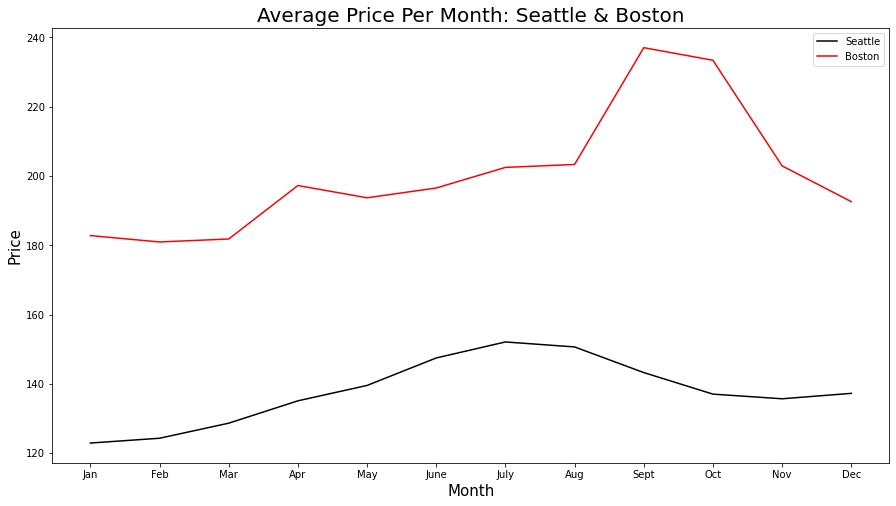

In [14]:
plt.figure(figsize=(15, 8))
s_avg_price.plot(label = 'Seattle', color = 'black')
b_avg_price.plot(label = 'Boston', color = 'red') 
plt.title('Average Price Per Month: Seattle & Boston', fontsize = 20)
plt.xticks(positions, labels)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.legend()
plt.savefig('Average Price Per Month: Seattle & Boston.png');

**From this chart, we can see that Boston's prices are more expensive than Seattle’s, but we can see that they both follow the same trend. They both start off at their lowest respective points in Jan. and then move up before taking a slight dip. However, ‌dips happen at different times. For example, Boston sees a massive dip from Oct. to Nov. while Seattle sees it starting from Aug. Boston also sees a surge from Aug. to Sept. which makes sense since we know that the number of properties available took a massive hit at that time. So, it simply supplies and demands.**